In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nc-dataset/GPP_India_2013_FC.nc


In [2]:
import xarray

In [3]:
!pip install netCDF4

In [4]:
df=xarray.open_dataset('../input/nc-dataset/GPP_India_2013_FC.nc')

In [5]:
df

<xarray.Dataset>
Dimensions:  (lon: 68, lat: 78, time: 365)
Coordinates:
  * lon      (lon) float64 66.25 66.75 67.25 67.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float64 44.75 44.25 43.75 43.25 42.75 ... 7.75 7.25 6.75 6.25
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Data variables:
    GPP      (time, lat, lon) float32 ...
Attributes:
    title:                GPP based on FLUXCOM RS+METEO with CRUNCEPv6 climate 
    version:              v1
    forcing:              CRUNCEPv6
    method:               Artificial Neural Networks
    flux:                 GPP
    temporal_resolution:  daily
    reference:            Jung et al. 2016, Nature; Tramontana et al. 2016, B...
    institution:          MPI-BGC-BGI
    provided_by:          Martin Jung [mjung@bgc-jena.mpg.de] on behalf of FL...
    created_by:           Fabian Gans [fgans@bgc-jena.mpg.de], Ulrich Weber [...

# 1. When we refer to a dimension

##### we are referring to some characteristic of our data that will influence the value of a variable of interest. Dimensions may be continuous—for instance a spatial dimension (e.g. latitude or longitude), or a temporal dimension (e.g. time of an observation).

##### In working with climate data, you are likely to find that values are provided across two horizontal spatial dimensions (latitude and longitude) and across a temporal dimension (the time for which the value was projected). Depending on your variable of interest, you may also find that the variable has additional dimensions; for instance, vertical spatial dimensions such as the pressure level.

A variable with the same name as a dimension is called a coordinate variable. Many programs that read netCDF files recognize and use any coordinate values they find. 

what I could find of gpp is ,
Gross primary production (GPP) is the total amount of carbon dioxide "fixed" by land plants per unit time through the photosynthetic reduction of CO2 into organic compounds.

#  2. how to access the data 

### open_dataset only reads the metadata from the netcdf file , does not attempt to read the actual data

### data is stored in dictionary ,known as data_vars

In [6]:
df.data_vars

Data variables:
    GPP      (time, lat, lon) float32 ...

In [7]:
# Looping over the dataset variables
for variable in df:
    print(variable)

GPP


In [8]:
df['GPP']
# this is an xarray and xarray dataset is made up of 1 or more data arrays
# which may share coordinates

<xarray.DataArray 'GPP' (time: 365, lat: 78, lon: 68)>
[1935960 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 66.25 66.75 67.25 67.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float64 44.75 44.25 43.75 43.25 42.75 ... 7.75 7.25 6.75 6.25
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Attributes:
    long_name:  GPP
    units:      gC m-2 day-1

In [9]:
# subsetting a dataset by time and space --> slicing
gpp=df['GPP']

# 3. x array is build on top of numpy and stores the variables as numpy array

In [10]:
gpp.shape

(365, 78, 68)

In [11]:
print(f'the attributes of thisgpp file is {gpp.attrs}')
print(f'the dimensions of this gipp file are {gpp.dims}')

the attributes of thisgpp file is {'long_name': 'GPP', 'units': 'gC m-2 day-1'}
the dimensions of this gipp file are ('time', 'lat', 'lon')


In [12]:
gpp[0,:]

<xarray.DataArray 'GPP' (lat: 78, lon: 68)>
array([[-0.008947, -0.121561, -0.008332, ..., -0.008332,  0.      ,       nan],
       [-0.396805, -0.229982, -0.178279, ...,       nan,       nan, -0.45542 ],
       [-0.34386 , -0.338045, -0.176872, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,  0.      ,  5.892541],
       [      nan,       nan,       nan, ...,       nan,  0.      ,  0.      ],
       [      nan,       nan,       nan, ...,       nan,  0.      ,  0.      ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 66.25 66.75 67.25 67.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float64 44.75 44.25 43.75 43.25 42.75 ... 7.75 7.25 6.75 6.25
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:  GPP
    units:      gC m-2 day-1

# 4. isel and sel

#### xarray.Dataset.isel returns a new dataset with each array indexed along the specified dimension(s).

In [13]:
gpp.isel(time=3)

<xarray.DataArray 'GPP' (lat: 78, lon: 68)>
array([[-0.108996, -0.163728, -0.053075, ...,  0.057991,  0.      ,       nan],
       [-0.381552, -0.212591, -0.221376, ...,       nan,       nan, -0.441809],
       [-0.331036, -0.321266, -0.200497, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,  0.      ,  6.051696],
       [      nan,       nan,       nan, ...,       nan,  0.      ,  0.      ],
       [      nan,       nan,       nan, ...,       nan,  0.      ,  0.      ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 66.25 66.75 67.25 67.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float64 44.75 44.25 43.75 43.25 42.75 ... 7.75 7.25 6.75 6.25
    time     datetime64[ns] 2013-01-04
Attributes:
    long_name:  GPP
    units:      gC m-2 day-1

In [14]:
gpp.isel(time=slice(0,20))

<xarray.DataArray 'GPP' (time: 20, lat: 78, lon: 68)>
[106080 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 66.25 66.75 67.25 67.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float64 44.75 44.25 43.75 43.25 42.75 ... 7.75 7.25 6.75 6.25
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-01-20
Attributes:
    long_name:  GPP
    units:      gC m-2 day-1

In [15]:
gpp.sel(lon=slice(20,160),lat=slice(-80,23))

<xarray.DataArray 'GPP' (time: 365, lat: 0, lon: 68)>
array([], shape=(365, 0, 68), dtype=float32)
Coordinates:
  * lon      (lon) float64 66.25 66.75 67.25 67.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float64 
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Attributes:
    long_name:  GPP
    units:      gC m-2 day-1

# 5. operators can be chained to perform sequential operations

In [16]:

gpp.isel(time=2).sel(lon=slice(20,100),lat=slice(20,25))

# why did we use isel ? because in isel , we can explicitly mention a pertucular time
# if we want to input exact value in sel then it must be present in the array
# or 2nd thing - method = nearest  closest to the that exact number

<xarray.DataArray 'GPP' (lat: 0, lon: 68)>
array([], shape=(0, 68), dtype=float32)
Coordinates:
  * lon      (lon) float64 66.25 66.75 67.25 67.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float64 
    time     datetime64[ns] 2013-01-03
Attributes:
    long_name:  GPP
    units:      gC m-2 day-1

In [17]:
#gpp.isel(time=2).sel(lon=slice(20,100),lat=23,method='nearest') will throw an error because sel dosen't take exact values

In [18]:
gpp.isel(time=2).sel(lon=20,lat=23,method='nearest')

<xarray.DataArray 'GPP' ()>
array(nan, dtype=float32)
Coordinates:
    lon      float64 66.25
    lat      float64 23.25
    time     datetime64[ns] 2013-01-03
Attributes:
    long_name:  GPP
    units:      gC m-2 day-1

# Plotting

In [19]:
%matplotlib inline  

xarray.DataArray has a plot method

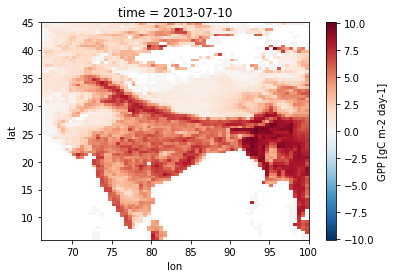

In [20]:
gpp.isel(time=190).plot()

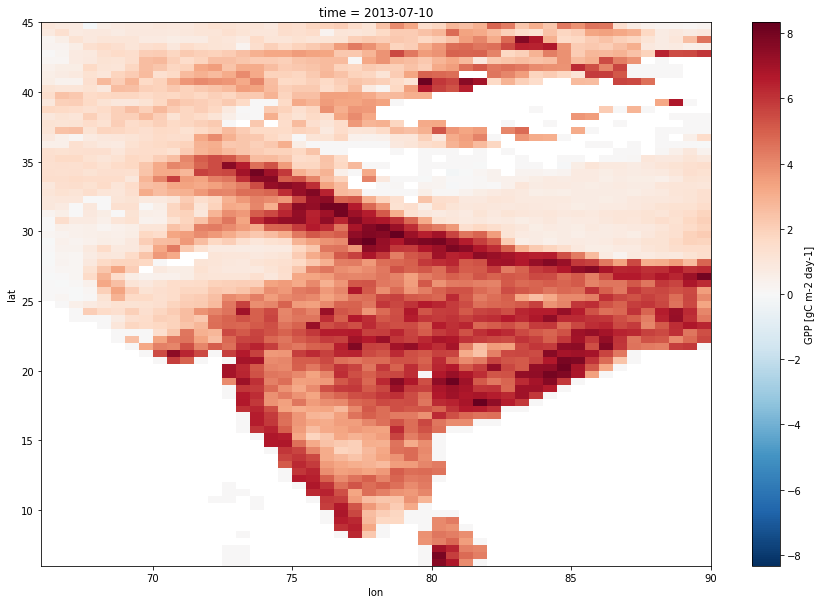

In [21]:
# operator chaining
gpp.isel(time=190).sel(lon=slice(50,90)).plot(size=10)

## Metrics calculations on Xarray

In [23]:
gpp.lat.mean()
gpp['lat'].mean()


<xarray.DataArray 'lat' ()>
array(25.5)

In [24]:
gpp.mean()

<xarray.DataArray 'GPP' ()>
array(2.00713, dtype=float32)

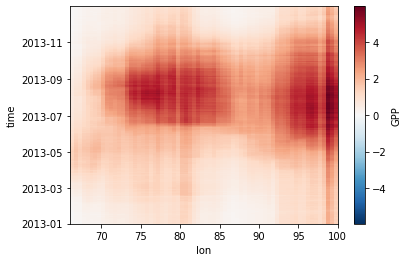

In [25]:
# some dimension of the gpp
gpp.mean(dim='lat').plot()

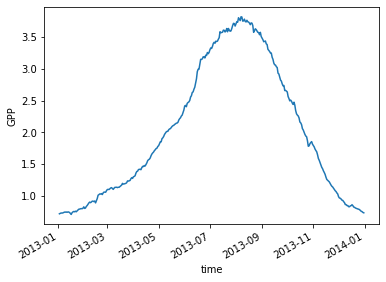

In [26]:
gpp.sel(time=slice('2013-01-03',None)).mean(dim=('lat','lon')).plot()
# so basically a 1D dataset
#mean in lat and lon implies a global mean of gpp in time

offset aliases

A number of string aliases are given to useful common time series frequencies. these are often called  as offset aliases.

Alias    Description

B        business day frequency

C        custom business day frequency

D        calendar day frequency

W        weekly frequency

M        month end frequency

SM       semi-month end frequency (15th and end of month)

BM       business month end frequency

CBM      custom business month end frequency

MS       month start frequency

SMS      semi-month start frequency (1st and 15th)

BMS      business month start frequency

CBMS     custom business month start frequency

Q        quarter end frequency

BQ       business quarter end frequency

QS       quarter start frequency

BQS      business quarter start frequency

A, Y     year end frequency

BA, BY   business year end frequency

AS, YS   year start frequency

BAS, BYS business year start frequency

BH       business hour frequency

H        hourly frequency

T, min   minutely frequency

S        secondly frequency

L, ms    milliseconds

U, us    microseconds

N        nanoseconds


In [27]:
# to check  whether there is any trend , we could see the monthly  values
gpp_monthly=gpp.sel(time=slice('2013-01-03',None)).resample(time='M').mean(dim='time')

In [28]:
print(gpp_monthly.dims,gpp_monthly.shape)

('time', 'lat', 'lon') (12, 78, 68)


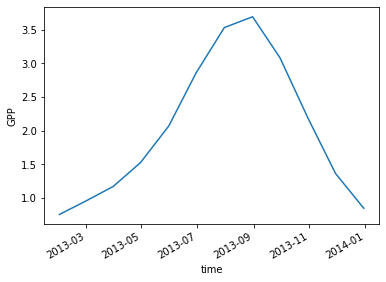

In [29]:
gpp_monthly.mean(dim=('lat','lon')).plot()

In [30]:
import matplotlib.pyplot as plt

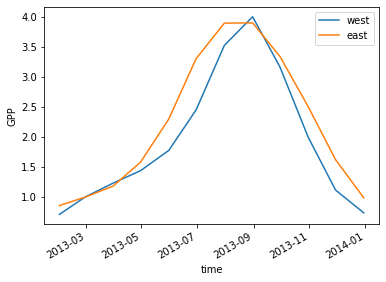

In [31]:
gpp_monthly.sel(lon=slice(70,78)).mean(dim=('lat','lon')).plot(label='west')
gpp_monthly.sel(lon=slice(79,None)).mean(dim=('lat','lon')).plot(label='east')
plt.legend()

In [32]:
for interval,data in gpp_monthly.groupby_bins('lat',bins=10):
    print(interval,data.dims,data.shape)
    #print(data)

(40.9, 44.75] ('time', 'lat', 'lon') (12, 8, 68)
(37.05, 40.9] ('time', 'lat', 'lon') (12, 8, 68)
(33.2, 37.05] ('time', 'lat', 'lon') (12, 8, 68)
(29.35, 33.2] ('time', 'lat', 'lon') (12, 7, 68)
(25.5, 29.35] ('time', 'lat', 'lon') (12, 8, 68)
(21.65, 25.5] ('time', 'lat', 'lon') (12, 8, 68)
(17.8, 21.65] ('time', 'lat', 'lon') (12, 7, 68)
(13.95, 17.8] ('time', 'lat', 'lon') (12, 8, 68)
(10.1, 13.95] ('time', 'lat', 'lon') (12, 8, 68)
(6.212, 10.1] ('time', 'lat', 'lon') (12, 8, 68)
